## Introduction 
### Non-linear SVM that can separate non-linearly separable data unlike the linear SVM
![](images/kernel1.jpg)
### How does the Non-linear (kernel) SVM do this ?
### Method 1 ->  `Mapping to a higher dimension`
### 1-D Example 
![](images/kernel2.jpg)
![](images/kernel3.jpg)
### 2-D Example
![](images/kernel4.jpg)
![](images/kernel5.jpg)
### But there is a catch
#### Mapping to a higher dimensional space can be highly compute-intensive
### Method 2 -> `Kernel Trick`
#### The Gaussian RBF Kernel Function
![](images/kernel6.jpg)
#### We use the kernel function to separate the dataset and build the decision boundary
![](images/kernel7.jpg)
#### The circumference of the kernel function is then projected onto the dataset.
![](images/kernel8.jpg)
#### Any point outside the projected circumference is assigned a 0 and anything inside it is assigned a  1.
#### We can combine multiple landmarks to make multiple decision boundaries for more comple data.
![](images/kernel9.jpg)
### Types of Kernel Functions
![](images/kernel10.jpg)

## Non-Linear SVR
### Watch video here : https://www.udemy.com/course/machinelearning/learn/lecture/19505940#content

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Importing the data

In [2]:
data = pd.read_csv('data/Social_Network_Ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Creating training and test splits

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building a Non-Linear SVM Classifier model using the `rbf` kernel.

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf',
         random_state = 0)

svm.fit(X_train, y_train)

SVC(random_state=0)

## Evaluating the model
### Using the `.score` method

In [8]:
svm.score(X_test, y_test)

0.93

### Using the sklearn `metrics`

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_preds = svm.predict(X_test)

In [11]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



In [10]:
print(accuracy_score(y_test, y_preds))

0.93


## Prediciting a new result

In [11]:
svm.predict(sc.transform([[30, 87000]]))

array([0])

## Creating a Confusion Matrix

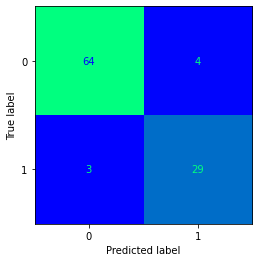

In [12]:
# Using sklearn to plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

plot_confusion_matrix(svm, X_test, y_test, colorbar=False, cmap='winter');

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


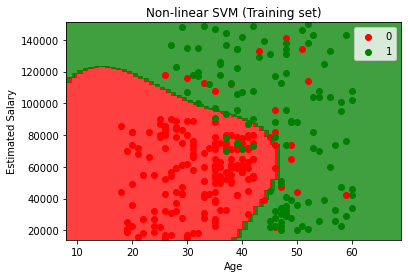

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Non-linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show();

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


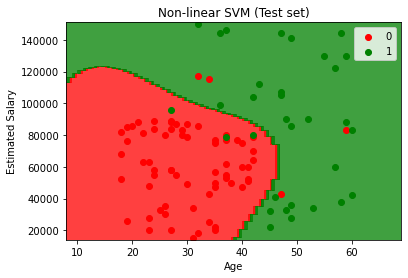

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, svm.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Non-linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()